In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import zipfile
import random
import shutil
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


In [3]:
anno_dir ='F:\\MLBig\\V-J_openCV_Adaboost\\Creating_VJ_Cascade - Copy1\\Medical Mask\\annotations'
images_dir = 'F:\\MLBig\\V-J_openCV_Adaboost\\Creating_VJ_Cascade - Copy1\\Medical Mask\\images'

    we have to create empty dirs manually
    "data\\p\\"
    "data\\n\\"

In [8]:
images=[]
labels=[]


poscounter=1
negcounter=1
masked_img  = False
for filename in os.listdir(images_dir):
    num = filename.split('.')[ 0 ]
    print("loading image: {}".format(filename))
    if int(num) > 1800:
        class_name = None
        anno = filename + ".json"
        with open(os.path.join(anno_dir, anno)) as json_file:
            json_data = json.load(json_file)
            no_anno = json_data["NumOfAnno"]
            k = 0
            for i in range(0, no_anno):
                class_nam = json_data['Annotations'][i]['classname']
                if class_nam in ['face_with_mask', "mask_surgical", "mask_colorful"]:
                    class_name = 'face_with_mask'
                    k = i
                    masked_img = True
                    break
                elif class_nam in ['face_no_mask,"hijab_niqab', 'face_other_covering', "face_with_mask_incorrect", "scarf_bandana","balaclava_ski_mask", "other" ]:                   
                    class_name = 'face_no_mask'
                    k = i
                    masked_img = False
                    break
                else:
                    continue
                    
            box = json_data[ 'Annotations' ][k][ 'BoundingBox' ]
            (x1, x2, y1, y2) = box
        if class_name is not None:
            image = cv2.imread(os.path.join(images_dir, filename))
            img = image[x2:y2, x1:y1]
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(class_name)  
            if masked_img:
                if filename.split('.')[ 1 ] == 'jpeg':
                    print('p\\'+str(poscounter)+"."+filename.split('.')[ 1 ])
                    cv2.imwrite('p\\'+str(poscounter)+"."+'jpg',img)
                    poscounter += 1
                else:
                    print('pos\\'+str(poscounter)+"."+filename.split('.')[ 1 ])
                    cv2.imwrite('p\\'+str(poscounter)+"."+filename.split('.')[ 1 ],img)
                    poscounter += 1
            else:
                if filename.split('.')[ 1 ] == 'jpeg':
                    print('neg\\'+str(negcounter)+"."+filename.split('.')[ 1 ])
                    cv2.imwrite('n\\'+str(negcounter)+"."+'jpg',img)
                    negcounter += 1
                else:
                    print('neg\\'+str(negcounter)+"."+filename.split('.')[ 1 ])
                    cv2.imwrite('n\\'+str(negcounter)+"."+filename.split('.')[ 1 ],img)
                    negcounter += 1

   

images = np.array(images, dtype="float32")
labels = np.array(labels)
print(len(images))
print(len(labels))

loading image: 0001.jpg
loading image: 0002.png
loading image: 0003.jpg
loading image: 0004.jpg
loading image: 0005.jpg
loading image: 0006.jpg
loading image: 0007.jpg
loading image: 0009.jpg
loading image: 0010.jpg
loading image: 0011.jpg
loading image: 0012.jpg
loading image: 0014.jpg
loading image: 0015.jpg
loading image: 0017.jpg
loading image: 0018.jpg
loading image: 0019.jpg
loading image: 0020.jpg
loading image: 0021.jpg
loading image: 0022.jpg
loading image: 0023.jpg
loading image: 0024.jpg
loading image: 0025.jpg
loading image: 0026.jpg
loading image: 0027.jpg
loading image: 0028.jpg
loading image: 0029.jpg
loading image: 0030.jpg
loading image: 0031.jpg
loading image: 0032.jpg
loading image: 0033.jpg
loading image: 0034.jpg
loading image: 0035.jpg
loading image: 0036.jpg
loading image: 0037.jpg
loading image: 0038.jpg
loading image: 0039.jpg
loading image: 0040.jpg
loading image: 0041.jpg
loading image: 0042.jpg
loading image: 0043.jpg
loading image: 0044.jpg
loading image: 0

neg\1.jpg
loading image: 1808.jpg
loading image: 1809.jpg
loading image: 1810.jpg
neg\2.jpg
loading image: 1811.jpg
loading image: 1812.jpg
pos\6.jpg
loading image: 1813.jpg
loading image: 1814.jpg
loading image: 1815.jpg
loading image: 1817.jpg
neg\3.jpg
loading image: 1818.jpg
pos\7.jpg
loading image: 1819.jpg
loading image: 1820.jpg
neg\4.jpg
loading image: 1821.jpg
pos\8.jpg
loading image: 1822.jpg
pos\9.jpg
loading image: 1823.jpg
pos\10.jpg
loading image: 1824.jpeg
neg\5.jpeg
loading image: 1825.jpg
pos\11.jpg
loading image: 1826.jpg
pos\12.jpg
loading image: 1827.jpg
pos\13.jpg
loading image: 1828.jpg
pos\14.jpg
loading image: 1829.jpg
pos\15.jpg
loading image: 1830.jpg
neg\6.jpg
loading image: 1831.jpg
loading image: 1832.jpg
neg\7.jpg
loading image: 1833.jpg
pos\16.jpg
loading image: 1834.jpg
neg\8.jpg
loading image: 1835.jpg
pos\17.jpg
loading image: 1836.jpg
pos\18.jpg
loading image: 1837.jpg
pos\19.jpg
loading image: 1838.jpg
neg\9.jpg
loading image: 1839.jpg
pos\20.jpg
loa

pos\168.jpg
loading image: 2074.jpg
neg\53.jpg
loading image: 2075.jpg
loading image: 2076.jpg
pos\169.jpg
loading image: 2077.jpg
pos\170.jpg
loading image: 2079.jpg
pos\171.jpg
loading image: 2080.jpg
pos\172.jpg
loading image: 2081.jpg
pos\173.jpg
loading image: 2082.jpg
pos\174.jpg
loading image: 2083.jpg
pos\175.jpg
loading image: 2084.jpg
pos\176.jpg
loading image: 2085.jpg
pos\177.jpg
loading image: 2086.jpg
pos\178.jpg
loading image: 2089.jpg
neg\54.jpg
loading image: 2090.jpg
pos\179.jpg
loading image: 2091.jpg
pos\180.jpg
loading image: 2092.jpg
neg\55.jpg
loading image: 2093.jpg
neg\56.jpg
loading image: 2094.jpg
pos\181.jpg
loading image: 2095.jpg
neg\57.jpg
loading image: 2096.jpg
pos\182.jpg
loading image: 2097.jpg
neg\58.jpg
loading image: 2098.jpg
loading image: 2099.jpg
pos\183.jpg
loading image: 2100.jpg
pos\184.jpg
loading image: 2101.jpg
pos\185.jpg
loading image: 2102.jpg
pos\186.jpg
loading image: 2103.jpg
loading image: 2104.jpg
pos\187.jpg
loading image: 2106.jp

loading image: 2330.png
neg\113.png
loading image: 2331.png
pos\336.png
loading image: 2333.png
pos\337.png
loading image: 2334.png
pos\338.png
loading image: 2335.png
pos\339.png
loading image: 2336.png
pos\340.png
loading image: 2337.png
pos\341.png
loading image: 2338.png
pos\342.png
loading image: 2339.png
pos\343.png
loading image: 2340.png
pos\344.png
loading image: 2341.png
pos\345.png
loading image: 2342.png
pos\346.png
loading image: 2343.png
neg\114.png
loading image: 2344.png
pos\347.png
loading image: 2345.png
pos\348.png
loading image: 2346.png
neg\115.png
loading image: 2348.png
neg\116.png
loading image: 2349.png
neg\117.png
loading image: 2350.png
pos\349.png
loading image: 2351.png
pos\350.png
loading image: 2352.png
pos\351.png
loading image: 2353.png
pos\352.png
loading image: 2354.png
pos\353.png
loading image: 2355.png
pos\354.png
loading image: 2356.png
pos\355.png
loading image: 2357.png
pos\356.png
loading image: 2358.png
pos\357.png
loading image: 2359.png
pos\

loading image: 2588.png
pos\510.png
loading image: 2589.png
pos\511.png
loading image: 2590.png
neg\168.png
loading image: 2591.png
pos\512.png
loading image: 2592.png
pos\513.png
loading image: 2593.png
pos\514.png
loading image: 2594.png
pos\515.png
loading image: 2595.png
pos\516.png
loading image: 2596.png
pos\517.png
loading image: 2597.png
pos\518.png
loading image: 2598.png
pos\519.png
loading image: 2599.png
pos\520.png
loading image: 2600.png
pos\521.png
loading image: 2601.png
pos\522.png
loading image: 2602.png
pos\523.png
loading image: 2603.png
neg\169.png
loading image: 2604.png
pos\524.png
loading image: 2605.png
pos\525.png
loading image: 2606.png
pos\526.png
loading image: 2607.png
pos\527.png
loading image: 2608.png
pos\528.png
loading image: 2609.png
neg\170.png
loading image: 2610.png
pos\529.png
loading image: 2611.png
neg\171.png
loading image: 2612.png
pos\530.png
loading image: 2613.png
pos\531.png
loading image: 2614.png
pos\532.png
loading image: 2615.png
pos\

loading image: 2846.png
pos\696.png
loading image: 2847.png
pos\697.png
loading image: 2848.png
pos\698.png
loading image: 2849.png
pos\699.png
loading image: 2850.png
pos\700.png
loading image: 2851.png
neg\212.png
loading image: 2852.png
pos\701.png
loading image: 2853.png
pos\702.png
loading image: 2854.png
pos\703.png
loading image: 2855.png
pos\704.png
loading image: 2856.png
neg\213.png
loading image: 2858.png
neg\214.png
loading image: 2859.png
pos\705.png
loading image: 2860.png
pos\706.png
loading image: 2861.png
pos\707.png
loading image: 2862.png
neg\215.png
loading image: 2864.png
pos\708.png
loading image: 2865.png
pos\709.png
loading image: 2866.png
pos\710.png
loading image: 2867.png
pos\711.png
loading image: 2868.png
pos\712.png
loading image: 2869.png
pos\713.png
loading image: 2870.png
pos\714.png
loading image: 2871.png
pos\715.png
loading image: 2873.png
pos\716.png
loading image: 2875.png
pos\717.png
loading image: 2876.png
pos\718.png
loading image: 2877.png
pos\

loading image: 3100.png
pos\874.png
loading image: 3101.png
pos\875.png
loading image: 3102.png
pos\876.png
loading image: 3103.png
pos\877.png
loading image: 3104.png
pos\878.png
loading image: 3105.png
pos\879.png
loading image: 3106.png
pos\880.png
loading image: 3107.png
pos\881.png
loading image: 3108.png
pos\882.png
loading image: 3109.png
pos\883.png
loading image: 3110.png
pos\884.png
loading image: 3111.png
pos\885.png
loading image: 3112.png
pos\886.png
loading image: 3113.png
pos\887.png
loading image: 3114.png
neg\257.png
loading image: 3115.png
neg\258.png
loading image: 3116.png
neg\259.png
loading image: 3117.png
neg\260.png
loading image: 3118.png
neg\261.png
loading image: 3119.png
neg\262.png
loading image: 3120.png
pos\888.png
loading image: 3121.png
pos\889.png
loading image: 3122.png
pos\890.png
loading image: 3123.png
pos\891.png
loading image: 3124.png
pos\892.png
loading image: 3125.png
pos\893.png
loading image: 3126.png
pos\894.png
loading image: 3128.png
pos\

loading image: 3347.png
pos\1045.png
loading image: 3348.png
pos\1046.png
loading image: 3349.png
pos\1047.png
loading image: 3350.png
pos\1048.png
loading image: 3351.png
pos\1049.png
loading image: 3352.png
pos\1050.png
loading image: 3353.png
pos\1051.png
loading image: 3354.png
pos\1052.png
loading image: 3355.png
pos\1053.png
loading image: 3356.png
neg\319.png
loading image: 3357.png
pos\1054.png
loading image: 3358.png
pos\1055.png
loading image: 3361.png
neg\320.png
loading image: 3362.png
pos\1056.png
loading image: 3363.png
pos\1057.png
loading image: 3364.png
pos\1058.png
loading image: 3365.png
pos\1059.png
loading image: 3366.png
pos\1060.png
loading image: 3367.png
neg\321.png
loading image: 3369.png
pos\1061.png
loading image: 3370.png
pos\1062.png
loading image: 3371.png
pos\1063.png
loading image: 3372.png
loading image: 3373.png
neg\322.png
loading image: 3374.png
neg\323.png
loading image: 3375.png
neg\324.png
loading image: 3376.png
pos\1064.png
loading image: 3377.

loading image: 3593.png
neg\368.png
loading image: 3594.png
pos\1222.png
loading image: 3595.png
pos\1223.png
loading image: 3596.png
neg\369.png
loading image: 3597.png
loading image: 3598.png
loading image: 3599.png
neg\370.png
loading image: 3600.png
neg\371.png
loading image: 3601.png
neg\372.png
loading image: 3602.png
neg\373.png
loading image: 3603.png
neg\374.png
loading image: 3604.png
neg\375.png
loading image: 3605.png
neg\376.png
loading image: 3606.png
neg\377.png
loading image: 3607.png
neg\378.png
loading image: 3608.png
pos\1224.png
loading image: 3609.png
pos\1225.png
loading image: 3610.png
loading image: 3611.png
loading image: 3612.png
pos\1226.png
loading image: 3613.png
neg\379.png
loading image: 3614.png
pos\1227.png
loading image: 3615.png
pos\1228.png
loading image: 3616.png
pos\1229.png
loading image: 3617.png
pos\1230.png
loading image: 3618.png
pos\1231.png
loading image: 3619.png
pos\1232.png
loading image: 3620.png
pos\1233.png
loading image: 3621.png
neg\

pos\1401.png
loading image: 3824.png
pos\1402.png
loading image: 3825.png
pos\1403.png
loading image: 3826.png
pos\1404.png
loading image: 3827.png
pos\1405.png
loading image: 3828.png
pos\1406.png
loading image: 3829.png
pos\1407.png
loading image: 3830.png
pos\1408.png
loading image: 3831.png
neg\409.png
loading image: 3832.png
pos\1409.png
loading image: 3833.png
pos\1410.png
loading image: 3834.png
pos\1411.png
loading image: 3835.png
pos\1412.png
loading image: 3836.png
pos\1413.png
loading image: 3837.png
pos\1414.png
loading image: 3838.png
pos\1415.png
loading image: 3839.png
pos\1416.png
loading image: 3840.png
pos\1417.png
loading image: 3841.png
pos\1418.png
loading image: 3842.png
pos\1419.png
loading image: 3843.png
neg\410.png
loading image: 3844.png
pos\1420.png
loading image: 3845.png
pos\1421.png
loading image: 3846.png
neg\411.png
loading image: 3847.png
neg\412.png
loading image: 3848.png
pos\1422.png
loading image: 3849.png
pos\1423.png
loading image: 3850.png
pos\1

loading image: 4061.png
neg\439.png
loading image: 4062.png
neg\440.png
loading image: 4063.png
pos\1603.png
loading image: 4064.png
pos\1604.png
loading image: 4065.png
pos\1605.png
loading image: 4067.png
pos\1606.png
loading image: 4069.png
pos\1607.png
loading image: 4070.png
pos\1608.png
loading image: 4071.png
pos\1609.png
loading image: 4072.png
pos\1610.png
loading image: 4073.png
pos\1611.png
loading image: 4074.png
pos\1612.png
loading image: 4075.png
pos\1613.png
loading image: 4076.png
pos\1614.png
loading image: 4077.png
pos\1615.png
loading image: 4079.png
pos\1616.png
loading image: 4080.png
pos\1617.png
loading image: 4081.png
pos\1618.png
loading image: 4082.png
pos\1619.png
loading image: 4083.png
pos\1620.png
loading image: 4084.png
pos\1621.png
loading image: 4085.png
pos\1622.png
loading image: 4086.png
pos\1623.png
loading image: 4088.png
neg\441.png
loading image: 4089.png
pos\1624.png
loading image: 4090.png
neg\442.png
loading image: 4091.png
neg\443.png
loadin

loading image: 4296.png
pos\1787.png
loading image: 4297.png
pos\1788.png
loading image: 4298.png
pos\1789.png
loading image: 4299.png
pos\1790.png
loading image: 4300.png
pos\1791.png
loading image: 4301.png
pos\1792.png
loading image: 4302.png
pos\1793.png
loading image: 4303.png
pos\1794.png
loading image: 4304.png
pos\1795.png
loading image: 4305.png
pos\1796.png
loading image: 4306.png
pos\1797.png
loading image: 4307.png
pos\1798.png
loading image: 4308.png
neg\476.png
loading image: 4309.png
pos\1799.png
loading image: 4310.png
pos\1800.png
loading image: 4311.png
pos\1801.png
loading image: 4312.png
pos\1802.png
loading image: 4313.png
pos\1803.png
loading image: 4314.png
pos\1804.png
loading image: 4315.png
neg\477.png
loading image: 4316.png
pos\1805.png
loading image: 4317.png
pos\1806.png
loading image: 4318.png
pos\1807.png
loading image: 4319.png
neg\478.png
loading image: 4320.png
pos\1808.png
loading image: 4321.png
pos\1809.png
loading image: 4322.png
pos\1810.png
load

pos\1970.png
loading image: 4526.png
pos\1971.png
loading image: 4527.png
pos\1972.png
loading image: 4528.png
pos\1973.png
loading image: 4529.png
pos\1974.png
loading image: 4530.png
neg\513.png
loading image: 4531.png
pos\1975.png
loading image: 4532.png
pos\1976.png
loading image: 4533.png
pos\1977.png
loading image: 4534.png
pos\1978.png
loading image: 4535.png
neg\514.png
loading image: 4536.png
pos\1979.png
loading image: 4537.png
pos\1980.png
loading image: 4538.png
pos\1981.png
loading image: 4539.png
neg\515.png
loading image: 4540.png
pos\1982.png
loading image: 4541.png
pos\1983.png
loading image: 4542.png
pos\1984.png
loading image: 4543.png
pos\1985.png
loading image: 4544.png
pos\1986.png
loading image: 4545.png
pos\1987.png
loading image: 4546.png
pos\1988.png
loading image: 4547.png
neg\516.png
loading image: 4548.png
pos\1989.png
loading image: 4549.png
pos\1990.png
loading image: 4550.png
pos\1991.png
loading image: 4551.png
pos\1992.png
loading image: 4552.png
pos\1

loading image: 4763.png
pos\2155.png
loading image: 4764.png
pos\2156.png
loading image: 4765.png
pos\2157.png
loading image: 4766.png
pos\2158.png
loading image: 4767.png
pos\2159.png
loading image: 4768.png
pos\2160.png
loading image: 4769.png
neg\558.png
loading image: 4770.png
neg\559.png
loading image: 4771.png
pos\2161.png
loading image: 4772.png
pos\2162.png
loading image: 4773.png
pos\2163.png
loading image: 4774.png
neg\560.png
loading image: 4775.png
pos\2164.png
loading image: 4776.png
pos\2165.png
loading image: 4777.png
pos\2166.png
loading image: 4778.png
pos\2167.png
loading image: 4779.png
pos\2168.png
loading image: 4780.png
neg\561.png
loading image: 4781.png
pos\2169.png
loading image: 4782.png
neg\562.png
loading image: 4783.png
neg\563.png
loading image: 4784.png
loading image: 4785.png
pos\2170.png
loading image: 4786.png
neg\564.png
loading image: 4788.png
neg\565.png
loading image: 4789.png
neg\566.png
loading image: 4790.png
neg\567.png
loading image: 4791.png


pos\2325.jpg
loading image: 5010.jpg
pos\2326.jpg
loading image: 5011.jpg
pos\2327.jpg
loading image: 5012.jpg
pos\2328.jpg
loading image: 5013.jpg
pos\2329.jpg
loading image: 5014.jpg
pos\2330.jpg
loading image: 5015.jpg
pos\2331.jpg
loading image: 5016.jpg
pos\2332.jpg
loading image: 5017.jpg
pos\2333.jpg
loading image: 5018.jpg
neg\617.jpg
loading image: 5019.jpg
pos\2334.jpg
loading image: 5020.jpg
pos\2335.jpg
loading image: 5021.jpg
loading image: 5022.jpg
pos\2336.jpg
loading image: 5023.jpg
pos\2337.jpg
loading image: 5024.jpg
pos\2338.jpg
loading image: 5027.jpg
pos\2339.jpg
loading image: 5028.jpg
pos\2340.jpg
loading image: 5029.jpg
pos\2341.jpg
loading image: 5030.jpg
pos\2342.jpg
loading image: 5031.jpg
pos\2343.jpg
loading image: 5032.jpg
neg\618.jpg
loading image: 5033.jpg
pos\2344.jpg
loading image: 5034.jpg
pos\2345.jpg
loading image: 5035.jpg
neg\619.jpg
loading image: 5037.jpg
pos\2346.jpg
loading image: 5038.jpg
pos\2347.jpg
loading image: 5039.jpg
neg\620.jpg
loadi

loading image: 5264.jpg
pos\2510.jpg
loading image: 5265.jpg
pos\2511.jpg
loading image: 5266.jpg
loading image: 5267.jpg
neg\653.jpg
loading image: 5268.jpg
neg\654.jpg
loading image: 5269.jpg
loading image: 5270.jpg
neg\655.jpg
loading image: 5271.jpg
neg\656.jpg
loading image: 5272.jpg
neg\657.jpg
loading image: 5273.jpg
loading image: 5274.jpg
loading image: 5275.jpg
loading image: 5276.jpg
pos\2512.jpg
loading image: 5277.jpg
loading image: 5278.jpg
neg\658.jpg
loading image: 5279.jpg
neg\659.jpg
loading image: 5280.jpg
neg\660.jpg
loading image: 5281.jpg
neg\661.jpg
loading image: 5282.jpg
neg\662.jpg
loading image: 5283.jpg
pos\2513.jpg
loading image: 5284.jpg
loading image: 5285.jpg
neg\663.jpg
loading image: 5286.jpg
neg\664.jpg
loading image: 5287.jpg
loading image: 5288.jpg
neg\665.jpg
loading image: 5289.jpg
neg\666.jpg
loading image: 5290.jpg
neg\667.jpg
loading image: 5291.jpg
loading image: 5292.jpg
neg\668.jpg
loading image: 5293.jpg
neg\669.jpg
loading image: 5294.jpg


neg\803.jpg
loading image: 5516.jpeg
neg\804.jpeg
loading image: 5517.jpg
neg\805.jpg
loading image: 5518.jpg
neg\806.jpg
loading image: 5519.jpg
loading image: 5520.jpg
neg\807.jpg
loading image: 5521.jpg
loading image: 5522.jpeg
neg\808.jpeg
loading image: 5523.jpg
neg\809.jpg
loading image: 5524.jpg
loading image: 5525.jpg
loading image: 5526.jpg
neg\810.jpg
loading image: 5527.jpg
loading image: 5528.jpg
neg\811.jpg
loading image: 5529.png
loading image: 5530.jpg
neg\812.jpg
loading image: 5531.jpg
neg\813.jpg
loading image: 5532.jpg
neg\814.jpg
loading image: 5533.jpg
loading image: 5534.jpg
loading image: 5535.jpg
neg\815.jpg
loading image: 5536.jpg
loading image: 5537.jpg
neg\816.jpg
loading image: 5538.jpg
loading image: 5539.jpg
loading image: 5540.jpg
loading image: 5541.jpg
loading image: 5542.jpg
neg\817.jpg
loading image: 5543.jpg
neg\818.jpg
loading image: 5544.jpg
loading image: 5545.jpg
loading image: 5546.jpeg
neg\819.jpeg
loading image: 5547.jpg
neg\820.jpg
loading im

neg\934.jpg
loading image: 5892.jpg
loading image: 5894.jpg
neg\935.jpg
loading image: 5897.jpg
neg\936.jpg
loading image: 5899.jpg
loading image: 5900.jpg
neg\937.jpg
loading image: 5903.jpg
loading image: 5907.jpg
loading image: 5910.jpg
loading image: 5911.jpg
loading image: 5912.jpg
loading image: 5913.jpg
neg\938.jpg
loading image: 5914.jpg
loading image: 5915.jpg
loading image: 5916.jpg
loading image: 5917.jpg
loading image: 5918.jpg
loading image: 5919.jpeg
loading image: 5920.jpeg
neg\939.jpeg
loading image: 5922.jpg
loading image: 5923.jpg
loading image: 5924.jpg
neg\940.jpg
loading image: 5925.jpeg
loading image: 5926.jpg
loading image: 5927.jpg
loading image: 5928.jpg
loading image: 5929.jpg
loading image: 5930.jpg
neg\941.jpg
loading image: 5931.jpg
neg\942.jpg
loading image: 5932.jpg
loading image: 5933.jpg
neg\943.jpg
loading image: 5934.jpg
loading image: 5935.jpg
neg\944.jpg
loading image: 5936.jpg
loading image: 5937.jpg
loading image: 5938.jpg
loading image: 5939.jpg


loading image: 6210.jpg
loading image: 6211.jpg
neg\1020.jpg
loading image: 6212.jpg
neg\1021.jpg
loading image: 6213.jpg
loading image: 6214.jpg
loading image: 6215.jpg
neg\1022.jpg
loading image: 6216.jpg
neg\1023.jpg
loading image: 6217.jpg
loading image: 6218.jpg
loading image: 6219.jpg
loading image: 6220.jpg
neg\1024.jpg
loading image: 6221.jpg
loading image: 6222.jpg
neg\1025.jpg
loading image: 6223.jpg
loading image: 6224.jpg
loading image: 6225.jpg
neg\1026.jpg
loading image: 6226.jpg
loading image: 6227.jpg
loading image: 6228.jpg
neg\1027.jpg
loading image: 6229.jpg
loading image: 6230.jpeg
loading image: 6231.jpg
loading image: 6232.jpg
loading image: 6233.jpg
loading image: 6234.jpg
loading image: 6235.jpg
loading image: 6236.jpg
neg\1028.jpg
loading image: 6237.jpg
loading image: 6238.jpg
loading image: 6239.jpg
neg\1029.jpg
loading image: 6240.jpg
loading image: 6241.jpg
loading image: 6242.jpg
loading image: 6243.jpg
neg\1030.jpg
loading image: 6244.jpg
loading image: 6

    new resized data should be in
    "data\\p\\"
    "data\\n\\"
    
    we have to create empty dirs manually
    "data\\train\\p"
    "data\\train\\n"
    "data\\test\\p"
    "data\\test\\n"

In [9]:
pos_dir = "data\\p\\"
neg_dir = "data\\n\\"

In [10]:
print("The number of images with facemask labelled 'yes':",len(os.listdir('p')))
print("The number of images with facemask labelled 'no':",len(os.listdir('n')))

The number of images with facemask labelled 'yes': 2606
The number of images with facemask labelled 'no': 1083


    split the dataset of images into test and train

In [11]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)
        
        
YES_SOURCE_DIR = pos_dir
TRAINING_YES_DIR = "data\\train\\p\\"
TESTING_YES_DIR = "data\\test\\p\\"
NO_SOURCE_DIR = neg_dir
TRAINING_NO_DIR = "data\\train\\n\\"
TESTING_NO_DIR = "data\\test\\n\\"
split_size = .8
split_data(YES_SOURCE_DIR, TRAINING_YES_DIR, TESTING_YES_DIR, split_size)
split_data(NO_SOURCE_DIR, TRAINING_NO_DIR, TESTING_NO_DIR, split_size)

In [12]:
print("The number of images with facemask in the training set labelled 'yes':", len(os.listdir(TRAINING_YES_DIR)))
print("The number of images with facemask in the test set labelled 'yes':", len(os.listdir(TESTING_YES_DIR)))
print("The number of images without facemask in the training set labelled 'no':", len(os.listdir(TRAINING_NO_DIR)))
print("The number of images without facemask in the test set labelled 'no':", len(os.listdir(TESTING_NO_DIR)))

The number of images with facemask in the training set labelled 'yes': 2084
The number of images with facemask in the test set labelled 'yes': 522
The number of images without facemask in the training set labelled 'no': 866
The number of images without facemask in the test set labelled 'no': 217


    Normallize the data and generate the test and train
    one hot encoding, zooming, height/width shift range, mirror effect, nearest 
fill mode defenition - (Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd)

In [35]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model1\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


-------------------------------------------------------------------------------------------------------------------------------

# model1

    simply start with 
    conv 100 into 
    conv 100 into 
    dense 50 into 
    dense 2
    -- Only 10 epochs to see if this simple model actually learning and improving without waisting too much computing time that we are limited in. (also its about 600-700 sec each step which is alot for me)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [37]:
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
295/295 [==============================] - 629s 2s/step - loss: 1.2810 - acc: 0.6956 - val_loss: 0.6282 - val_acc: 0.7064
INFO:tensorflow:Assets written to: model1\model-001.model\assets
Epoch 2/10
295/295 [==============================] - 608s 2s/step - loss: 0.6191 - acc: 0.7058 - val_loss: 0.6077 - val_acc: 0.7064
INFO:tensorflow:Assets written to: model1\model-002.model\assets
Epoch 3/10
295/295 [==============================] - 607s 2s/step - loss: 0.6153 - acc: 0.7064 - val_loss: 0.6056 - val_acc: 0.7064
INFO:tensorflow:Assets written to: model1\model-003.model\assets
Epoch 4/10
295/295 [==============================] - 605s 2s/step - loss: 0.6071 - acc: 0.7064 - val_loss: 0.6054 - val_acc: 0.7064
INFO:tensorflow:Assets written to: model1\model-004.model\assets
Epoch 5/10
295/295 [==============================] - 611s 2s/step - loss: 0.6055 - acc: 0.7064 - val_loss: 0.6055 - val_acc: 0.7064
Epoch 6/10
295/295 [==============================] - 611s 2s/step - loss: 

Test loss: 0.3814283013343811
Test accuracy: 0.699999988079071


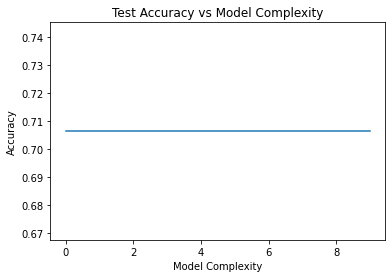

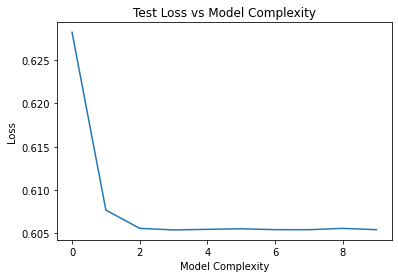

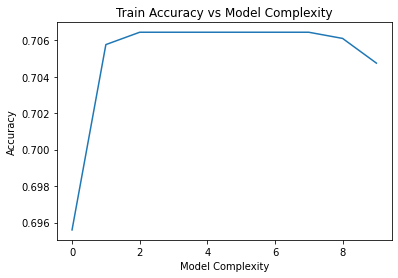

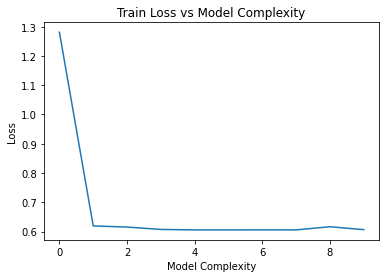

In [49]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
score = model.evaluate(X_test, y_test, verbose=0) 
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = 10 #reinitialization
i=-1
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

    val Acc seems to stuck 0.7064 & evaluate (on 10 batch size) got 0.6999 =~ 0.7064 so we add: 
    max pooling 2d - taking the maximum value over an input window.

    we load all the best models that we save and re-evaluate each one of them on 500 test images (instead of 10 batch)
    the data is splitted into diffrent dirs so there is no worry that we take train images

In [121]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

model_dir = "F:\\MLBig\\CNN\\1\\model1\\"
for directories in os.listdir(model_dir):
    try:
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
        print("failed to load model: "+directories) 
        pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: model-001.model
Test loss: 0.6199517846107483
Test accuracy: 0.7260000109672546
------------------------------------------------

model: model-002.model
Test loss: 0.5933279991149902
Test accuracy: 0.7260000109672546
------------------------------------------------

model: model-003.model
Test loss: 0.5891429781913757
Test accuracy: 0.7260000109672546
------------------------------------------------

model: model-004.model
Test loss: 0.5883023142814636
Test accuracy: 0.7260000109672546


# conclusion:
    even on 500 Batch size test you could see that this model cant learn anymore
    therefore we have to create more types (like BN, MaxPooling2D, etc) of layes to help our network make better 
    classification

-------------------------------------------------------------------------------------------------------------------------------

model 2
-----------------

In [50]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model2\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    since this model is more likely to work and each epoch take ~185 sec we can go ahead and train on 30 epochs

In [53]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/30
295/295 [==============================] - 184s 618ms/step - loss: 0.5669 - acc: 0.7081 - val_loss: 0.4641 - val_acc: 0.7172
INFO:tensorflow:Assets written to: model2\model-001.model\assets
Epoch 2/30
295/295 [==============================] - 184s 620ms/step - loss: 0.5279 - acc: 0.7105 - val_loss: 0.4586 - val_acc: 0.7077
INFO:tensorflow:Assets written to: model2\model-002.model\assets
Epoch 3/30
295/295 [==============================] - 180s 606ms/step - loss: 0.5261 - acc: 0.7224 - val_loss: 0.4508 - val_acc: 0.7645
INFO:tensorflow:Assets written to: model2\model-003.model\assets
Epoch 4/30
295/295 [==============================] - 181s 607ms/step - loss: 0.5197 - acc: 0.7220 - val_loss: 0.4427 - val_acc: 0.7659
INFO:tensorflow:Assets written to: model2\model-004.model\assets
Epoch 5/30
295/295 [==============================] - 180s 604ms/step - loss: 0.5171 - acc: 0.7200 - val_loss: 0.4420 - val_acc: 0.7781
INFO:tensorflow:Assets written to: model2\model-005.model\as

Test loss: 0.4039498269557953
Test accuracy: 0.800000011920929


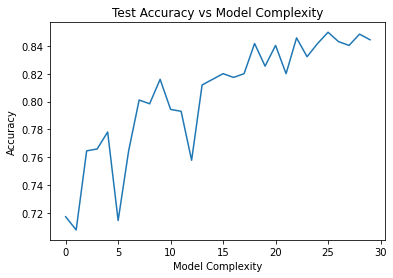

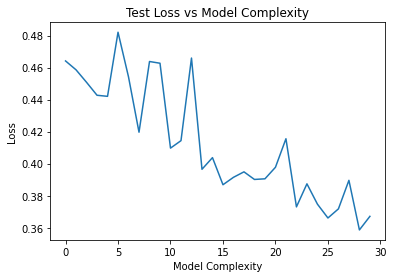

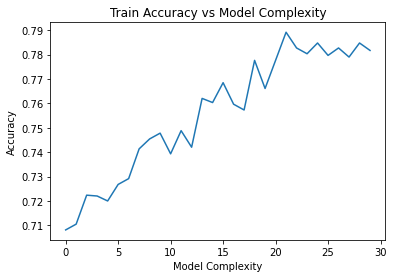

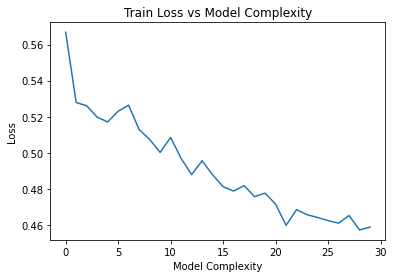

In [73]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
score = model.evaluate(X_test, y_test, verbose=0) 
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = 30 #reinitialization
i=-1
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

    we load all the best models that we save and re-evaluate them on 500 test images (instead of 10 batch)
    the data is splitted into diffrent dirs so there is no worry that we take train images

In [120]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

model_dir = "F:\\MLBig\\CNN\\1\\model2\\"
for directories in os.listdir(model_dir):
    try:
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
        print("failed to load model: "+directories) 
        pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: model-001.model
Test loss: 0.47940170764923096
Test accuracy: 0.7099999785423279
------------------------------------------------

model: model-002.model
Test loss: 0.47372615337371826
Test accuracy: 0.6959999799728394
------------------------------------------------

model: model-003.model
Test loss: 0.4612542390823364
Test accuracy: 0.765999972820282
------------------------------------------------

model: model-004.model
Test loss: 0.4531974792480469
Test accuracy: 0.7760000228881836
------------------------------------------------

model: model-005.model
Test loss: 0.4525867700576782
Test accuracy: 0.7879999876022339
------------------------------------------------

model: model-008.model
Test loss: 0.4309435188770294
Test accuracy: 0.8059999942779541
------------------------------------------------

model: model-011.model
Test loss: 0.4226838946342468
Test accuracy: 0.7960000038146973

# conclusion:
    we fixed the not learning model problem from model1.
    the maxpooling best model had Test accuracy: 0.8519999980926514 vs 0.7260000109672546 almost 13% more accurate!
    therefore it is netural to guess that BatchNorm would work here.


-------------------------------------------------------------------------------------------------------------------------------

# Model3
    Try adding BatchNormalization and see if we get better results

In [17]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model3\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [19]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/30
295/295 [==============================] - 194s 657ms/step - loss: 0.6152 - acc: 0.6797 - val_loss: 0.5665 - val_acc: 0.7064
INFO:tensorflow:Assets written to: model3\model-001.model\assets
Epoch 2/30
295/295 [==============================] - 195s 660ms/step - loss: 0.5351 - acc: 0.7336 - val_loss: 0.5533 - val_acc: 0.6969
INFO:tensorflow:Assets written to: model3\model-002.model\assets
Epoch 3/30
295/295 [==============================] - 196s 664ms/step - loss: 0.5214 - acc: 0.7403 - val_loss: 0.7801 - val_acc: 0.5196
Epoch 4/30
295/295 [==============================] - 194s 659ms/step - loss: 0.5109 - acc: 0.7580 - val_loss: 0.4455 - val_acc: 0.7740
INFO:tensorflow:Assets written to: model3\model-004.model\assets
Epoch 5/30
295/295 [==============================] - 201s 682ms/step - loss: 0.5046 - acc: 0.7454 - val_loss: 0.4494 - val_acc: 0.7551
Epoch 6/30
295/295 [==============================] - 197s 667ms/step - loss: 0.4966 - acc: 0.7522 - val_loss: 0.4679 - val_a

In [77]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0] )
print("Test accuracy:", score[1])

Test loss: 0.321698269557953
Test accuracy: 0.876999988079071


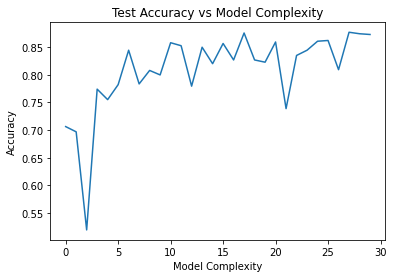

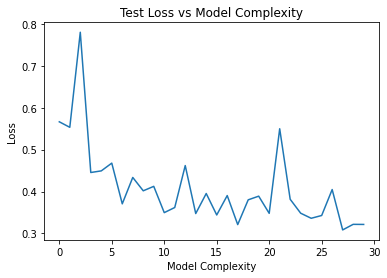

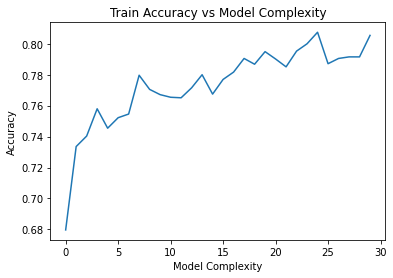

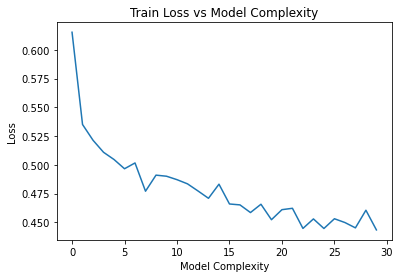

In [23]:
#val_acc: 0.8728 ~=~=~ 0.88
#weve been improved the model.


epochs = 30 #reinitialization
i=-1
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

In [119]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

model_dir = "F:\\MLBig\\CNN\\1\\model3\\"
for directories in os.listdir(model_dir):
    try:
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
        print("failed to load model: "+directories) 
        pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: model-001.model
Test loss: 0.5691101551055908
Test accuracy: 0.7020000219345093
------------------------------------------------

model: model-002.model
Test loss: 0.5359645485877991
Test accuracy: 0.7139999866485596
------------------------------------------------

model: model-004.model
Test loss: 0.44754400849342346
Test accuracy: 0.7760000228881836
------------------------------------------------

model: model-007.model
Test loss: 0.36811235547065735
Test accuracy: 0.8479999899864197
------------------------------------------------

model: model-011.model
Test loss: 0.3562265932559967
Test accuracy: 0.8519999980926514
------------------------------------------------

model: model-014.model
Test loss: 0.3585596978664398
Test accuracy: 0.8479999899864197
------------------------------------------------

model: model-016.model
Test loss: 0.3433709740638733
Test accuracy: 0.853999972343444

# Conclusions:
    The batch normalization added more then 2% extra acc to the best model: 0.8740000128746033 vs 0.8519999980926514
    also lower the loss Test loss: 0.3299017548561096 vs 0.3763861358165741

-------------------------------------------------------------------------------------------------------------------------------

model4
----------
    lets try and change the optimizaer to SGD with learning rate to try and remove the learning spikes

In [24]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model4\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['acc'])

In [26]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
295/295 [==============================] - 192s 648ms/step - loss: 0.6203 - acc: 0.6864 - val_loss: 0.5593 - val_acc: 0.7510
INFO:tensorflow:Assets written to: model4\model-001.model\assets
Epoch 2/30
295/295 [==============================] - 193s 655ms/step - loss: 0.5374 - acc: 0.7458 - val_loss: 0.4533 - val_acc: 0.7767
INFO:tensorflow:Assets written to: model4\model-002.model\assets
Epoch 3/30
295/295 [==============================] - 196s 664ms/step - loss: 0.5110 - acc: 0.7590 - val_loss: 0.4303 - val_acc: 0.8241
INFO:tensorflow:Assets written to: model4\model-003.model\assets
Epoch 4/30
295/295 [==============================] - 196s 663ms/step - loss: 0.5063 - acc: 0.7569 - val_loss: 0.4259 - val_acc: 0.8092
INFO:tensorflow:Assets written to: model4\model-004.model\assets
Epoch 5/30
295/295 [==============================] - 201s 683ms/step - loss: 0.4854 - acc: 0.7658 - val_loss: 0.5511 - val_acc: 0.7307
Epoch 6/30
295/295 [==============================] - 199s 6

Test loss: 0.27300623059272766
Test accuracy: 0.8999999761581421


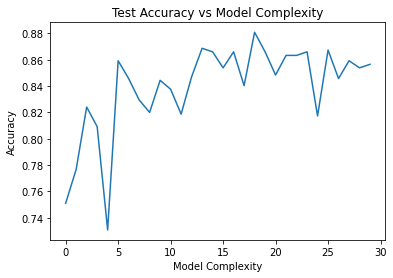

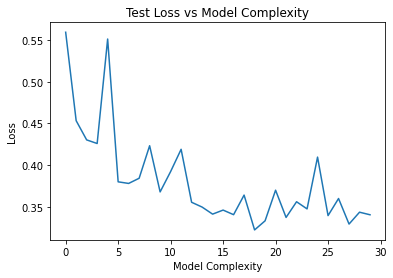

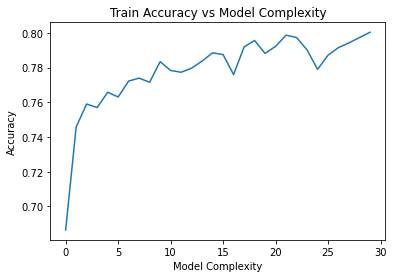

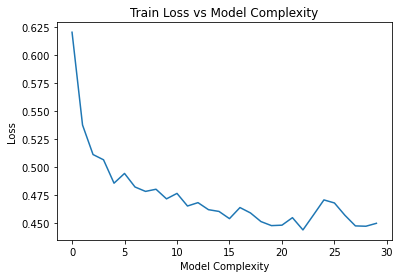

In [28]:
#Test accuracy: 0.8999 ~~~> 0.9
#Test loss: 0.27300623059272766 ~~~> 0.27
#weve been improved the model.
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
score = model.evaluate(X_test, y_test, verbose=0) 
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = 30 #reinitialization
i=-1
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

In [118]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

model_dir = "F:\\MLBig\\CNN\\1\\model4\\"
for directories in os.listdir(model_dir):
    try:
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
        print("failed to load model: "+directories) 
        pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: model-001.model
Test loss: 0.49779680371284485
Test accuracy: 0.7279999852180481
------------------------------------------------

model: model-002.model
Test loss: 0.4639281630516052
Test accuracy: 0.7559999823570251
------------------------------------------------

model: model-003.model
Test loss: 0.3804851174354553
Test accuracy: 0.8240000009536743
------------------------------------------------

model: model-004.model
Test loss: 0.4287000894546509
Test accuracy: 0.7940000295639038
------------------------------------------------

model: model-006.model
Test loss: 0.38396456837654114
Test accuracy: 0.8500000238418579
------------------------------------------------

model: model-007.model
Test loss: 0.3779631555080414
Test accuracy: 0.8360000252723694
------------------------------------------------

model: model-010.model
Test loss: 0.3765149414539337
Test accuracy: 0.824000000953674

In [ ]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
model = tf.keras.models.load_model("F:\\MLBig\\CNN\\1\\model5\\model-029.model")
score = model.evaluate(X_test, y_test, verbose=0) 
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# conclusions:
    the sgd did made the spikes smaller on the loss and acc graphs.
    and had the best acc 0.8759999871253967 vs 0.8740000128746033 almost 2% better!

-------------------------------------------------------------------------------------------------------------------------------

model5
----------
    lets try and make our network Wider.

In [105]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model5\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(200, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [84]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/30
295/295 [==============================] - 486s 2s/step - loss: 0.6198 - acc: 0.6742 - val_loss: 0.5571 - val_acc: 0.7172
INFO:tensorflow:Assets written to: model5\model-001.model\assets
Epoch 2/30
295/295 [==============================] - 493s 2s/step - loss: 0.5512 - acc: 0.7129 - val_loss: 0.4809 - val_acc: 0.7876
INFO:tensorflow:Assets written to: model5\model-002.model\assets
Epoch 3/30
295/295 [==============================] - 484s 2s/step - loss: 0.5254 - acc: 0.7336 - val_loss: 0.4510 - val_acc: 0.7835
INFO:tensorflow:Assets written to: model5\model-003.model\assets
Epoch 4/30
295/295 [==============================] - 487s 2s/step - loss: 0.5171 - acc: 0.7356 - val_loss: 0.4544 - val_acc: 0.8065
Epoch 5/30
295/295 [==============================] - 489s 2s/step - loss: 0.4980 - acc: 0.7549 - val_loss: 0.4322 - val_acc: 0.7957
INFO:tensorflow:Assets written to: model5\model-005.model\assets
Epoch 6/30
295/295 [==============================] - 479s 2s/step - loss: 

Test loss: 0.36952871084213257
Test accuracy: 0.8999999761581421


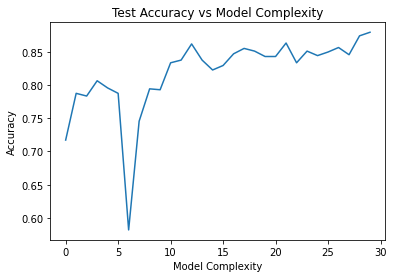

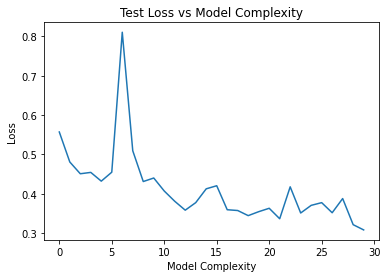

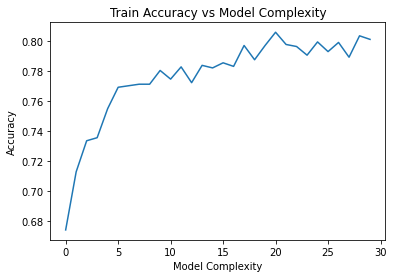

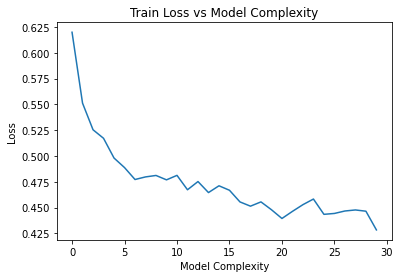

In [96]:
#Test accuracy: 0.8999 ~~~> 0.9
#Test loss: 0.27300623059272766 ~~~> 0.27
#weve been improved the model.
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
score = model.evaluate(X_test, y_test, verbose=0) 
print("Test loss:", score[0])
print("Test accuracy:", score[1])

epochs = 30 #reinitialization
i=-1
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

---------------------------------------------------------Read Me-------------------------------------------------------------
# Here I noticed i evaluate on 10 Batch size but luckly we saved the models and can re-evaluate. 
next(validation_generator) depended on the batch size
# We increased the batch size to 500 on the imageDataGen.
# We evaluate each model saved on the new datagen to have a better evaluation, and because of that it will be easier to choose the best model later.
-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))


In [116]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)


for directories in os.listdir("F:\\MLBig\\CNN\\1\\model5\\"):
    try:
        model = tf.keras.models.load_model("F:\\MLBig\\CNN\\1\\model5\\" + directories)
        
        #forgot to add this to the code (print) here, 
        #it takes awhile to load all these models and evaluate and its not mendatory
        #print("------------------------------------------------\n")
        
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        print("failed to load model: "+directories)
        pass

model: model-001.model
Test loss: 0.5655503869056702
Test accuracy: 0.7160000205039978
model: model-002.model
Test loss: 0.49259570240974426
Test accuracy: 0.7799999713897705
model: model-003.model
Test loss: 0.4645511209964752
Test accuracy: 0.7720000147819519
model: model-005.model
Test loss: 0.45101597905158997
Test accuracy: 0.7879999876022339
model: model-009.model
Test loss: 0.4232821762561798
Test accuracy: 0.800000011920929
model: model-011.model
Test loss: 0.40955522656440735
Test accuracy: 0.8299999833106995
model: model-012.model
Test loss: 0.3869986832141876
Test accuracy: 0.8379999995231628
model: model-013.model
Test loss: 0.3660466969013214
Test accuracy: 0.8619999885559082
model: model-018.model
Test loss: 0.37143754959106445
Test accuracy: 0.8460000157356262
model: model-019.model
Test loss: 0.35610440373420715
Test accuracy: 0.8399999737739563
model: model-022.model
Test loss: 0.3456055223941803
Test accuracy: 0.8640000224113464
model: model-029.model
Test loss: 0.330

# best model: model-030.model
    Test loss: 0.31755298376083374
    Test accuracy: 0.8759999871253967

    now we gonna add this code to the models above


# conclutions: 
    wider network did gives us better results in the accuracy (0.8759999871253967 vs 0.8740000128746033 almost 2%(compared to model3 since model4 use sgd but this use adam)) and it did had less loss.
    in oppose to that cost more compute time and more params.

-------------------------------------------------------------------------------------------------------------------------------

model6
----------
# lets try and make our network Longer and swap to sgd.
since sgd was better (model3 vs model4)
therefore this model will be compared to model4 and not to model5 above(model5 optimizer=adam).

In [122]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('model4\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [125]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['acc'])

In [126]:
history = model6.fit(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/30
295/295 [==============================] - 280s 939ms/step - loss: 0.6397 - acc: 0.6756 - val_loss: 0.5737 - val_acc: 0.7077


INFO:tensorflow:Assets written to: model4\model-001.model\assets
Epoch 2/30
295/295 [==============================] - 292s 984ms/step - loss: 0.5461 - acc: 0.7214 - val_loss: 0.4273 - val_acc: 0.8309
INFO:tensorflow:Assets written to: model4\model-002.model\assets
Epoch 3/30
295/295 [==============================] - 298s 1s/step - loss: 0.5101 - acc: 0.7512 - val_loss: 0.3811 - val_acc: 0.8552
INFO:tensorflow:Assets written to: model4\model-003.model\assets
Epoch 4/30
295/295 [==============================] - 294s 991ms/step - loss: 0.5061 - acc: 0.7597 - val_loss: 0.4313 - val_acc: 0.7957
Epoch 5/30
295/295 [==============================] - 301s 1s/step - loss: 0.4887 - acc: 0.7651 - val_loss: 0.3709 - val_acc: 0.8471
INFO:tensorflow:Assets written to: model4\model-005.model\assets
Epoch 6/30
295/295 [==============================] - 223s 752ms/step - loss: 0.4803 - acc: 0.7729 - val_loss: 0.3591 - val_acc: 0.8633
INFO:tensorflow:Assets written to: model4\model-006.model\assets
E

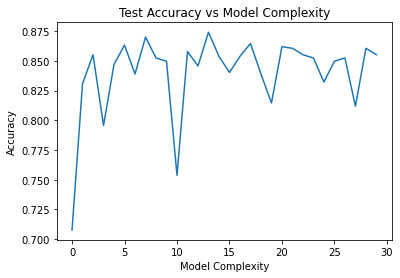

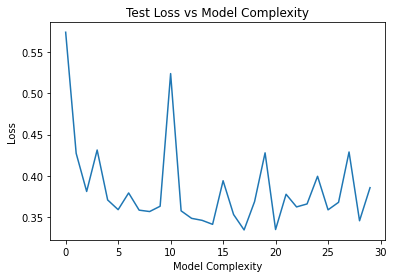

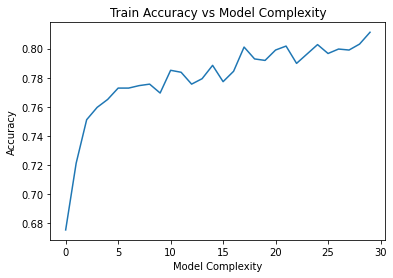

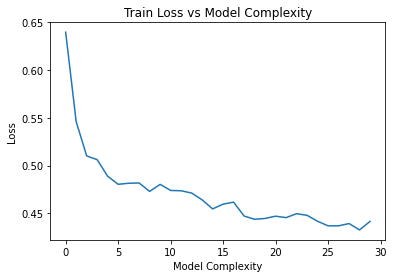

In [128]:
epochs = 30 #reinitialization
i=0
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['acc'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

we mistakenly write over model4 data but with this code we could still evaluate this model models

In [133]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)
tmp = 1
model_dir = "F:\\MLBig\\CNN\\1\\model4\\"
for directories in os.listdir(model_dir):
    try:
        if tmp not in [1,2,3,5,6,8,9,13,14,15,18]:
            tmp+=1
            if tmp == 10:
                tmp+=2
            if tmp == 16:
                tmp+=1
            continue
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        tmp+=1
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
        
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors and skip
        #curropted models
        tmp+=1
        print("failed to load model: "+directories) 
        pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: model-001.model
Test loss: 0.5685557723045349
Test accuracy: 0.7099999785423279
------------------------------------------------

model: model-002.model
Test loss: 0.4302104413509369
Test accuracy: 0.828000009059906
------------------------------------------------

model: model-003.model
Test loss: 0.38411784172058105
Test accuracy: 0.8600000143051147
------------------------------------------------

model: model-005.model
Test loss: 0.36887282133102417
Test accuracy: 0.8460000157356262
------------------------------------------------

model: model-006.model
Test loss: 0.36187744140625
Test accuracy: 0.8619999885559082
------------------------------------------------

model: model-008.model
Test loss: 0.3587759733200073
Test accuracy: 0.8740000128746033
------------------------------------------------

model: model-009.model
Test loss: 0.3616897761821747
Test accuracy: 0.8579999804496765
-

In [ ]:
# no significant improvment.

    we can keep try changing hyper params but we want 1 accurate and fast model and its really hard for us to pass 87.6% acc

# changing hyper params:
-add more dropouts
-add more dense layers
-add more BN

change strides:
-of the maxpooling
-of the Conv2D

we could also change the thickness and length with increasing/decreasing values (of the Conv2D and dense layers)

then compare results and take the best model.

-------------------------------------------------------------------------------------------------------------------------------

# Model7
    we will use mobileNetV2 in order to make a CNN that would be able to run on smartphone because mobile net uses less params
    inorder to save CPU/GPU usage due to depth seprable conv.
    

# about mobileNetV2:
    MobileNetV2
    In MobileNetV2, there are two types of blocks. One is residual block with stride of 1. Another one is block with stride of 2 for downsizing.
    There are 3 layers for both types of blocks.
    -This time, the first layer is 1×1 convolution with ReLU6.
    -The second layer is the depthwise convolution.
    -The third layer is another 1×1 convolution but without any non-linearity. It is claimed that if ReLU is used again, the deep networks only have the power of a linear classifier on the non-zero volume part of the output domain.
    
src: https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c
src depth seprable conv: https://www.youtube.com/watch?v=vfCvmenkbZA&ab_channel=WhenMathsMeetCoding

# Depthwise Separable Convolution
    Depthwise Separable Convolution splits the computation into two steps: depthwise convolution applies a single convolutional filter per each input channel and pointwise convolution is used to create a linear combination of the output of the depthwise convolution. The comparison of standard convolution and depthwise separable convolution is shown to the right.

In [140]:
TRAINING_DIR = "data\\train\\"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(224, 224))
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(224, 224))
checkpoint = ModelCheckpoint('preTraiedModel\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 2950 images belonging to 2 classes.
Found 739 images belonging to 2 classes.


In [144]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

INIT_LR = 1e-4
EPOCHS = 30
BS = 32

# load the MobileNetV2 CNN
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# place the head of the model to the top of the the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model7 = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# not be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False


model7.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS), metrics=["accuracy"])

# train the head of the network
history = model7.fit(train_generator,validation_data=validation_generator,epochs=EPOCHS,callbacks=[checkpoint])

Epoch 1/30
295/295 [==============================] - 73s 235ms/step - loss: 0.5982 - accuracy: 0.7214 - val_loss: 0.4464 - val_accuracy: 0.8065
Epoch 2/30
295/295 [==============================] - 70s 232ms/step - loss: 0.4815 - accuracy: 0.7824 - val_loss: 0.3736 - val_accuracy: 0.8647
Epoch 3/30
295/295 [==============================] - 71s 233ms/step - loss: 0.4531 - accuracy: 0.7980 - val_loss: 0.3397 - val_accuracy: 0.8714
Epoch 4/30
295/295 [==============================] - 71s 236ms/step - loss: 0.4224 - accuracy: 0.8241 - val_loss: 0.3206 - val_accuracy: 0.8742
Epoch 5/30
295/295 [==============================] - 71s 234ms/step - loss: 0.3989 - accuracy: 0.8325 - val_loss: 0.3046 - val_accuracy: 0.8809
Epoch 6/30
295/295 [==============================] - 70s 231ms/step - loss: 0.3875 - accuracy: 0.8349 - val_loss: 0.2960 - val_accuracy: 0.8782
Epoch 7/30
295/295 [==============================] - 71s 235ms/step - loss: 0.3848 - accuracy: 0.8359 - val_loss: 0.2907 - val_ac

c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: preTraiedModel\model-021.model\assets
Epoch 22/30
295/295 [==============================] - 70s 233ms/step - loss: 0.3032 - accuracy: 0.8803 - val_loss: 0.2479 - val_accuracy: 0.9012


c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: preTraiedModel\model-022.model\assets
Epoch 23/30
295/295 [==============================] - 74s 247ms/step - loss: 0.3020 - accuracy: 0.8800 - val_loss: 0.2434 - val_accuracy: 0.9026


c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: preTraiedModel\model-023.model\assets
Epoch 24/30
295/295 [==============================] - 71s 236ms/step - loss: 0.2909 - accuracy: 0.8807 - val_loss: 0.2489 - val_accuracy: 0.8985
Epoch 25/30
295/295 [==============================] - 71s 233ms/step - loss: 0.2917 - accuracy: 0.8858 - val_loss: 0.2489 - val_accuracy: 0.8985
Epoch 26/30
295/295 [==============================] - 71s 234ms/step - loss: 0.2782 - accuracy: 0.8878 - val_loss: 0.2440 - val_accuracy: 0.8958
Epoch 27/30
295/295 [==============================] - 71s 236ms/step - loss: 0.2714 - accuracy: 0.8925 - val_loss: 0.2431 - val_accuracy: 0.9026


c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: preTraiedModel\model-027.model\assets
Epoch 28/30
295/295 [==============================] - 68s 227ms/step - loss: 0.2830 - accuracy: 0.8834 - val_loss: 0.2378 - val_accuracy: 0.9012


c:\users\tomer\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: preTraiedModel\model-028.model\assets
Epoch 29/30
295/295 [==============================] - 68s 226ms/step - loss: 0.2781 - accuracy: 0.8929 - val_loss: 0.2406 - val_accuracy: 0.9066
Epoch 30/30
295/295 [==============================] - 70s 231ms/step - loss: 0.2806 - accuracy: 0.8847 - val_loss: 0.2436 - val_accuracy: 0.9026


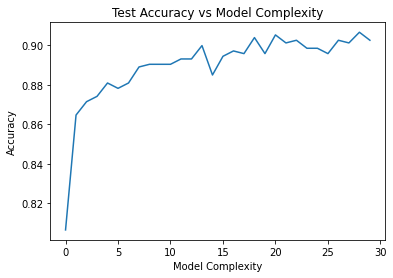

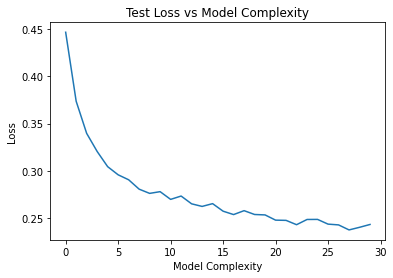

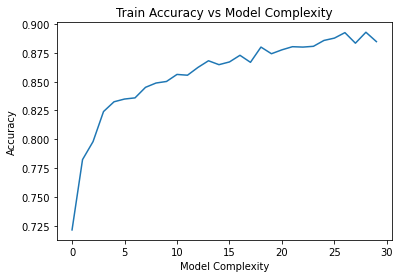

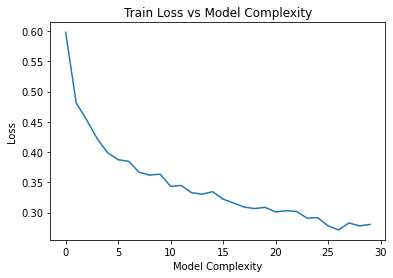

In [147]:
epochs = 30 #reinitialization
i=0
tmp = np.zeros([ epochs ])
while(i< epochs ):
    tmp[i]=i
    i = i+1
plt.plot(tmp,history.history['val_accuracy'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['val_loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Test Loss vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['accuracy'])
plt.xlabel('Model Complexity')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Model Complexity')
plt.show()
plt.plot(tmp,history.history['loss'])
plt.xlabel('Model Complexity')
plt.ylabel('Loss')
plt.title('Train Loss vs Model Complexity')
plt.show()

In [145]:
model7.save("preTraiedModel\\mobileNetV2FaceMask.model", save_format="h5")

In [148]:
VALIDATION_DIR = "data\\test\\"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=500, 
                                                         target_size=(224, 224))

X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

model_dir = "F:\\MLBig\\CNN\\1\\preTraiedModel\\"
for directories in os.listdir(model_dir):
    try:
        model = tf.keras.models.load_model(model_dir + directories)
        print("------------------------------------------------\n")
        print("model: "+directories)
        score = model.evaluate(X_test, y_test, verbose=0) 
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
    except:
        #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
        print("failed to load model: "+directories) 
        pass
try:    
    print("------------------------------------------------\n")
    print("model: final")  
    model = tf.keras.models.load_model(model_dir + "mobileNetV2FaceMask.model.h5")
    score = model.evaluate(X_test, y_test, verbose=0) 
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
except:
    #incase something went wrong we still wanna evaluate other models and dont wanna waist compute time on errors
    print("failed to load model: "+directories) 
    pass

Found 739 images belonging to 2 classes.
------------------------------------------------

model: mobileNetV2FaceMask.model
Test loss: 0.24195456504821777
Test accuracy: 0.9079999923706055
------------------------------------------------

model: model-021.model
Test loss: 0.2483815848827362
Test accuracy: 0.9139999747276306
------------------------------------------------

model: model-022.model
Test loss: 0.2450689971446991
Test accuracy: 0.9020000100135803
------------------------------------------------

model: model-023.model
Test loss: 0.2417958676815033
Test accuracy: 0.906000018119812
------------------------------------------------

model: model-027.model
Test loss: 0.24099481105804443
Test accuracy: 0.9079999923706055
------------------------------------------------

model: model-028.model
Test loss: 0.23501119017601013
Test accuracy: 0.9079999923706055
------------------------------------------------

model: final
failed to load model: model-028.model


# final best acc is model-21
Test accuracy: 0.9139999747276306

Example of real time mask detection vid using mobile net on OpenMe folder

In [164]:
#load the 91.4% acc model
model = tf.keras.models.load_model("F:\\MLBig\\CNN\\1\\preTraiedModel\\model-021.model")

labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror
    
    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini,1.05,5)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,224,224,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key`
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

# Conclusions:
    model 4 was most accurate from the models we created and model 5 slightly behind him, we got stuck at 87.6% and changing small things didnt dramatically changed acc anymore
    therefore we took mobileNetV2 which is light and accurate and score 91.4% which is enough for us.

# Notes:
    weve tried to train the model on gray scale images and the results was worse so we stayed RGB.